In [26]:
from utils_mae import *
from Model_mae import *
from dataset_mae import *
from Train_mae import *
from Reconstruct_mae import *

In [45]:
inp = np.random.rand(1, 125, 125, 8).astype('float32')

In [46]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [47]:
dataset = Custom_Dataset(inp, transform)

In [48]:
dataloader = DataLoader(dataset, batch_size = 1, shuffle = True)

In [49]:
model = mae_vit_base_patch16_dec512d8b(img_size=125, mask_ratio = 0.75)

In [50]:
model = torch.load('/DATA/Shashank/GSOC 2024/Masked_Autoencoder/Masked_Autoencoder/model.pth')

In [51]:
predict = Predict(model)

In [53]:
for batch in dataloader:
    img = batch['img'].to('cuda')
    op = predict.predict(img)

In [54]:
op.shape

torch.Size([1, 625, 200])

In [55]:
def unpatchify(x):
    """
    x: (N, L, patch_size**2 *3)
    imgs: (N, 8, H, W)
    """
    p = 5
    h = w = int(x.shape[1]**.5)
    assert h * w == x.shape[1]
    
    x = x.reshape(shape=(x.shape[0], h, w, p, p, 8))
    x = torch.einsum('nhwpqc->nchpwq', x)
    imgs = x.reshape(shape=(x.shape[0], 8, h * p, h * p))
    return imgs

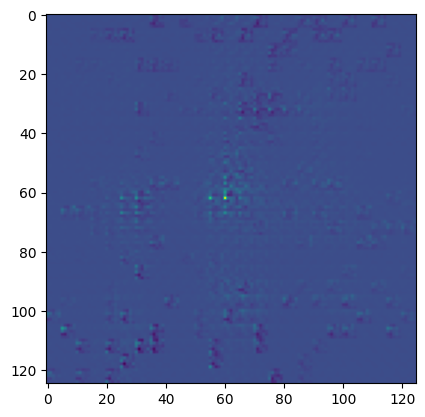

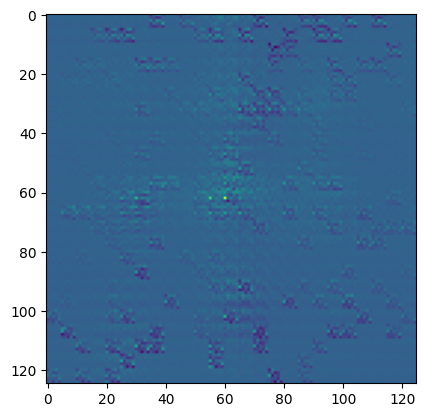

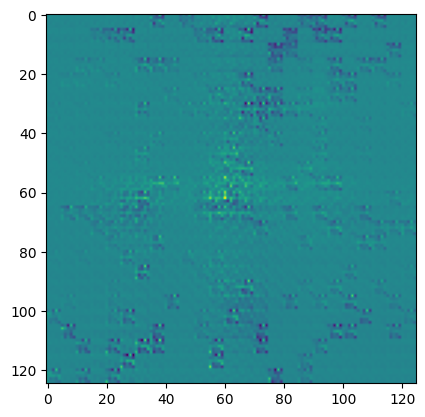

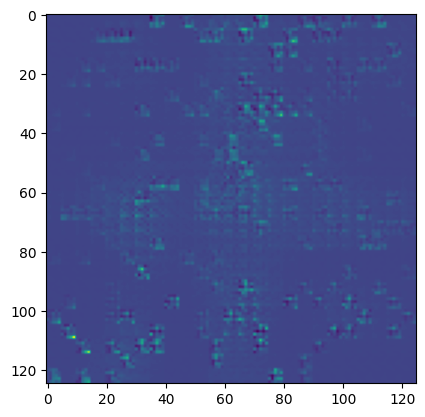

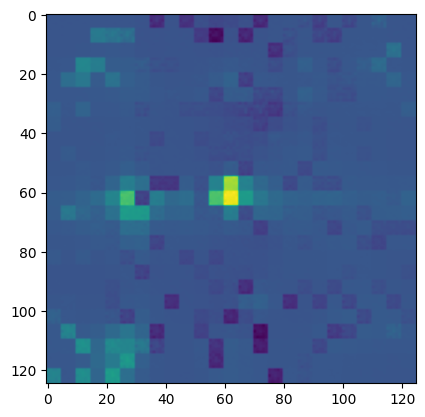

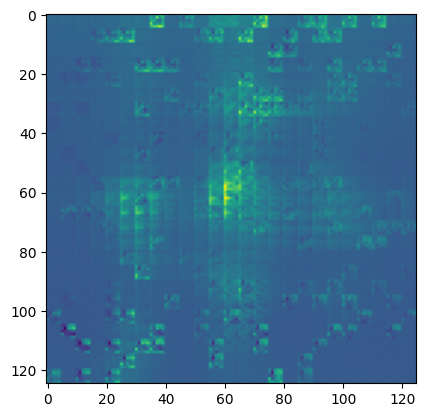

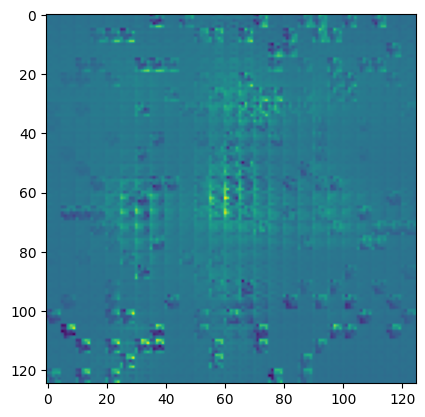

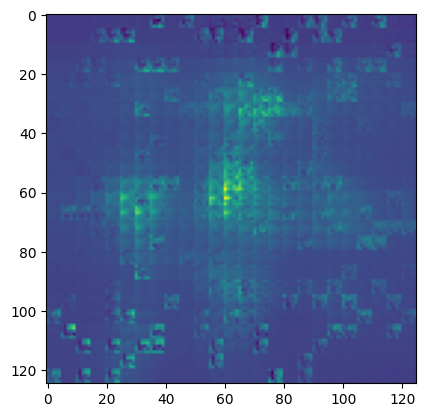

In [57]:
pred = unpatchify(op)
pred.shape
pred = pred.reshape((8, 125, 125))
pred.shape

img = pred.permute(1,2,0)
img = img.cpu().detach().numpy()

import matplotlib.pyplot as plt
for i in range(8):
    plt.imshow(img[:,:,i])
    plt.show()